<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [7]:
ndf = df.select_dtypes('number')

In [8]:
ndf.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.000,3,1.000,1180,5650,1.000,nan,0.000,3,7,1180,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,3,7,2170,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,180000.000,2,1.000,770,10000,1.000,0.000,0.000,3,6,770,1933,nan,98028,47.738,-122.233,2720,8062
3,2487200875,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,5,7,1050,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,3,8,1680,1987,0.000,98074,47.617,-122.045,1800,7503


In [10]:
sum(ndf['view'] == 0)

19422

In [11]:
count_0 = {}
for col in ndf.columns:
    count_0[col] = sum(ndf[col] == 0)

In [24]:
rgb = ['price', 'sqft_living', 'zipcode']
rgb_d = {}

In [25]:
for col in ndf.columns:
    try:
        rgb_d[col] = ndf[col].apply(lambda x: 255 - (255/x))
    except:
        pass
df = pd.DataFrame(rgb_d)

In [ ]:
# bedrooms, bathrooms, floors

In [31]:
df = df[['bedrooms', 'bathrooms', 'floors']]

In [34]:
image = np.array(df)

In [35]:
from PIL import Image

In [39]:
import matplotlib.pyplot as plt

In [59]:
img = Image.open('img/output_122_0.png')

In [74]:
146*147


21462

In [77]:
image = image[0:21462].reshape((146, 147, 3))

In [79]:
fft_p = image.astype(np.uint8)
new_p = Image.fromarray(fft_p)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


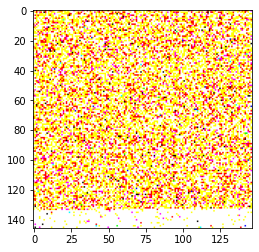

In [80]:
fig, ax = plt.subplots()
ax.imshow(image)

In [46]:
image[0:2000].shape

(2000, 3)

In [83]:
df.describe()

,bedrooms,bathrooms,floors
count,21597.000,21597.000,21597.000
mean,173.001,114.540,62.142
std,27.279,60.578,63.078
min,0.000,-255.000,0.000
25%,170.000,109.286,0.000
50%,170.000,141.667,85.000
75%,191.250,153.000,127.500
max,247.273,223.125,182.143


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


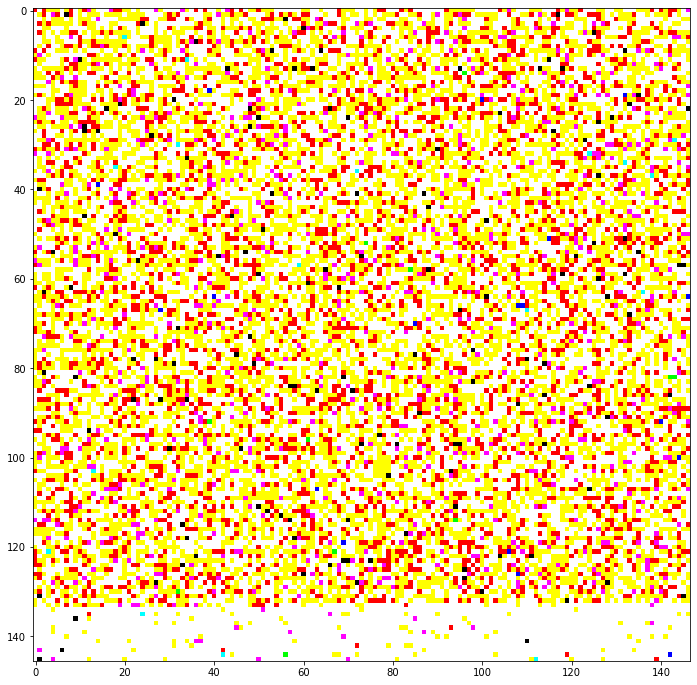

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlframe import MLFrame
rgb_d = {}
df = MLFrame(pd.read_csv('kc_house_data.csv'))
ndf = df.select_dtypes('number')
for col in ndf.columns:
    try:
        rgb_d[col] = ndf[col].apply(lambda x: 255 - abs(255/x))
    except:
        pass
df = pd.DataFrame(rgb_d)
df = df[['bedrooms', 'bathrooms', 'floors']]
image = np.array(df)
image = image[0:21462].reshape((146, 147, 3))
fft_p = image.astype(np.uint8)
new_p = Image.fromarray(fft_p)
fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(image)

In [179]:
MLFrame(rgb_d).describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,255.000,254.999,173.001,114.540,254.853,254.955,62.142,177.701,220.949,254.829,254.871,254.997,249.638,252.913,254.857,254.956
std,0.000,0.000,27.279,60.578,0.065,0.046,63.078,14.265,5.063,0.071,0.002,0.000,0.016,0.002,0.046,0.039
min,255.000,254.997,0.000,-255.000,254.311,254.510,0.000,0.000,170.000,254.311,254.866,254.997,249.592,252.898,254.361,254.608
25%,255.000,254.999,170.000,109.286,254.822,254.949,0.000,170.000,218.571,254.786,254.869,254.997,249.628,252.912,254.829,254.950
50%,255.000,254.999,170.000,141.667,254.866,254.967,85.000,170.000,218.571,254.837,254.871,254.997,249.640,252.914,254.861,254.967
75%,255.000,255.000,191.250,153.000,254.900,254.976,127.500,191.250,223.125,254.885,254.872,254.997,249.652,252.915,254.892,254.975
max,255.000,255.000,247.273,223.125,254.981,255.000,182.143,204.000,235.385,254.973,254.873,254.997,249.663,252.919,254.959,255.000


In [109]:
price = np.array(rgb_d['price'])
price *= 255/image.max()

In [136]:
one = ndf['price'] / (255*ndf['price'].max())
two = ndf['price'].apply(lambda x: 255 - (255/x))

In [174]:
ndf['long'][0]

-122.257

In [176]:
(255/-122)

-2.0901639344262297